## Notebook Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Constants

In [1]:
VOCABULARY_WORD_SIZE = 2500

TOKEN_SPAM_PROBABILITY_DATA_FILE = "C:/Users/BediZ/DS-ML/Jupyter Notebook - ML Projects/resources/SpamData/03_Testing/spam-probability.txt"
TOKEN_HAM_PROBABILITY_DATA_FILE = "C:/Users/BediZ/DS-ML/Jupyter Notebook - ML Projects/resources/SpamData/03_Testing/ham-probability.txt"
TOKEN_ALL_PROBABILITY_DATA_FILE = "C:/Users/BediZ/DS-ML/Jupyter Notebook - ML Projects/resources/SpamData/03_Testing/all-probability.txt"

TEST_FEATURE_MATRIX_DATA_FILE = "C:/Users/BediZ/DS-ML/Jupyter Notebook - ML Projects/resources/SpamData/03_Testing/test-features.txt"
TEST_TARGET_MATRIX_DATA_FILE = "C:/Users/BediZ/DS-ML/Jupyter Notebook - ML Projects/resources/SpamData/03_Testing/test-target.txt"



## Load the Data

In [45]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX_DATA_FILE, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_MATRIX_DATA_FILE, delimiter=' ')
# Token Probabilities

spam_token_probability = np.loadtxt(TOKEN_SPAM_PROBABILITY_DATA_FILE, delimiter=' ')
ham_token_probability = np.loadtxt(TOKEN_HAM_PROBABILITY_DATA_FILE, delimiter=' ')
all_token_probability = np.loadtxt(TOKEN_ALL_PROBABILITY_DATA_FILE, delimiter=' ')

## Calculating the Joint Porbability
#### The Dot PRoduct

In [46]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a = ', a)
print('b = ', b)
print('a dot b = ', a.dot(b))

a =  [1 2 3]
b =  [0 5 4]
a dot b =  22


In [47]:
c = np.array([[0,6],[3,0],[5,1]])
print('s.shape = ', c.shape)
print(c)

s.shape =  (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [48]:
print(a.dot(c))
print('Shape of the dot product is = ', a.dot(c).shape)

[21  9]
Shape of the dot product is =  (2,)


In [49]:
print('Shape of the dot product is: ', X_test.dot(spam_token_probability).shape)

Shape of the dot product is:  (1524,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [50]:
SPAM_PROBABILITY_GUESS = 0.3116

In [51]:
np.log(spam_token_probability)

array([ -4.53513387,  -4.53766232,  -5.0504077 , ...,  -9.8234009 ,
       -10.20639316,  -9.20087129])

## Joint probability in log format

In [52]:
joint_log_spam = X_test.dot(np.log(spam_token_probability) - np.log(all_token_probability)) + np.log(SPAM_PROBABILITY_GUESS)
joint_log_spam[:5]

array([  1.92712603,  -0.46657447,   2.76531895,   6.20433887,
       -13.02798833])

## Set the Prior

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1 - P(Spam))} {P(X)}$$

In [53]:
np.log(ham_token_probability)

array([ -3.84497716,  -5.55421561,  -4.60865449, ..., -10.4570182 ,
        -8.91657316, -11.55563049])

In [54]:
joint_log_ham = X_test.dot(np.log(ham_token_probability) - np.log(all_token_probability)) + np.log(1 - SPAM_PROBABILITY_GUESS)

In [55]:
joint_log_ham[:5]

array([ -87.4241609 ,  -17.96252539,  -48.94646523, -115.52029495,
         -2.27238179])

In [56]:
joint_log_ham.size

1524

## making Predictions

## Checking for the higher joint probability

$$P(Spam \,  | \, X) \, > \, P(Ham \, | \, X)$$
$$or$$
$$P(Spam \,  | \, X) \, < \, P(Ham \, | \, X)$$

In [57]:
prediction = joint_log_spam > joint_log_ham

In [58]:
prediction[-5:]

array([False, False, False, False, False])

In [59]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) P(Spam) != \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [62]:
joint_log_spam = X_test.dot(np.log(spam_token_probability)) + np.log(SPAM_PROBABILITY_GUESS)
joint_log_ham = X_test.dot(np.log(ham_token_probability)) + np.log(1-SPAM_PROBABILITY_GUESS)

## Metrics and Evaluation
#### Accuracy

In [67]:
number_correct_doc = (y_test == prediction).sum()
print('Docs Classified Correctrly:', number_correct_doc)
number_wrong_docs = X_test.shape[0] - correct_doc
print('Docs Classified Wrong:', number_wrong_docs)

Docs Classified Correctrly: 1449
Docs Classified Wrong: 75


In [70]:
# Accuracy
number_correct_doc / len(X_test) 

0.9507874015748031

In [72]:
number_fraction_wrong = number_wrong_docs / len(X_test) 
print('Fraction classified incorrectly is  {:.2%}'.format(number_fraction_wrong))
print('Accuracy of the model is  {:.2%}'.format(1-number_fraction_wrong))

Fraction classified incorrectly is  4.92%
Accuracy of the model is  95.08%


## Visualising the results

In [89]:
# Chart Styling Info
y_axis_label = 'P(X | Spam)'
x_axis_label = 'P(X | Ham)'

linedata = np.linspace(start=-14000, stop=700 , num=1000)

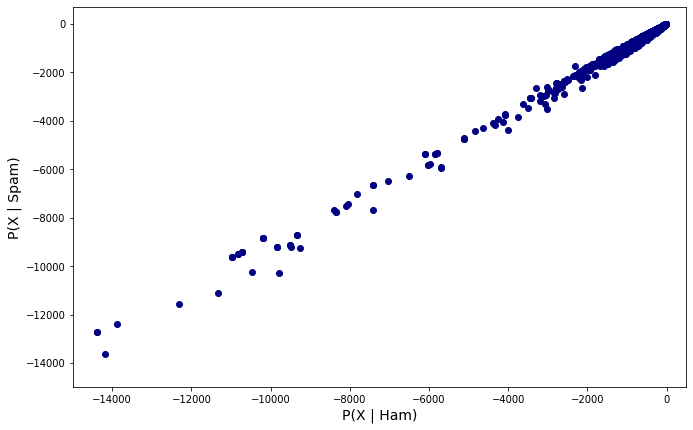

In [85]:
plt.figure(figsize=(11,7))
plt.xlabel(x_axis_label, fontsize=14)
plt.ylabel(y_axis_label, fontsize=14)

#Set scale
plt.xlim([-15000, 500])
plt.ylim([-15000, 700])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundry

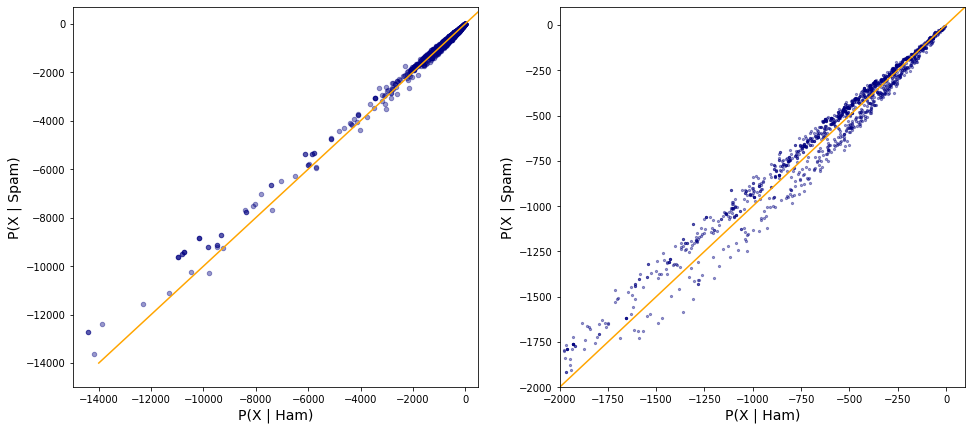

In [97]:
plt.figure(figsize=(16,7))

# Chart #1
plt.subplot(1,2,1)

plt.xlabel(x_axis_label, fontsize=14)
plt.ylabel(y_axis_label, fontsize=14)

#Set scale
plt.xlim([-15000, 500])
plt.ylim([-15000, 700])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha = 0.4, s=20)
plt.plot(linedata, linedata, color='orange')

# Chart #2
plt.subplot(1,2,2)


plt.xlabel(x_axis_label, fontsize=14)
plt.ylabel(y_axis_label, fontsize=14)

#Set scale
plt.xlim([-2000, 100])
plt.ylim([-2000, 100])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha = 0.4, s=5)
plt.plot(linedata, linedata, color='orange')


plt.show()

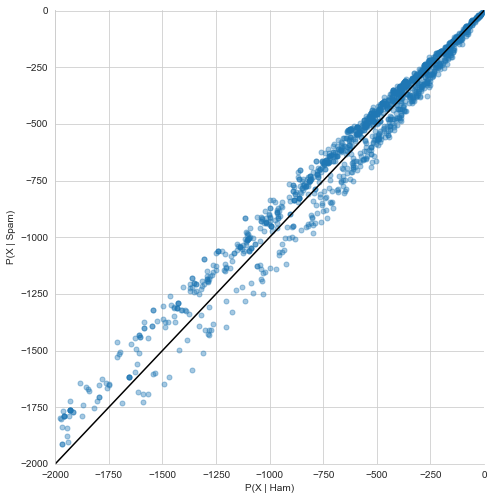

In [116]:
# Chart Styling

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_DataFrame = pd.DataFrame({y_axis_label: joint_log_spam, x_axis_label: joint_log_ham,
                                 labels: y_test})

sns.lmplot(x=x_axis_label, y=y_axis_label, data=summary_DataFrame, height= 7, fit_reg=False,
          scatter_kws={'alpha': 0.4, 's':25})
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata,linedata,color='black')

plt.show()

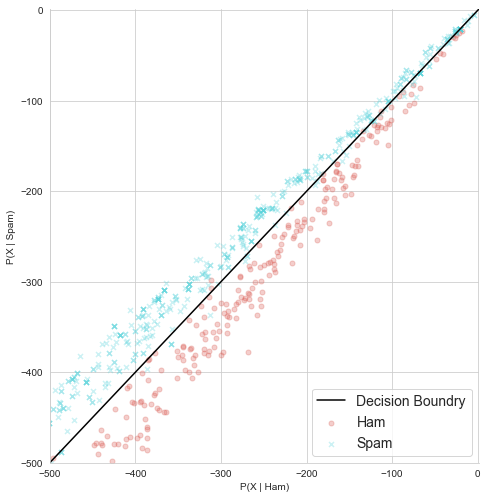

In [128]:
# Chart Styling

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_DataFrame = pd.DataFrame({y_axis_label: joint_log_spam, x_axis_label: joint_log_ham,
                                 labels: y_test})

sns.lmplot(x=x_axis_label, y=y_axis_label, data=summary_DataFrame, height= 7, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.3, 's':25}, hue = labels, markers = ['o', 'x'], palette = 'hls')
plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata,linedata,color='black')

plt.legend(('Decision Boundry', 'Ham', 'Spam'), loc= 'lower right', fontsize=14)

plt.show()

### False Positives and False Negatives

In [129]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([ 493, 1031], dtype=int64))

In [133]:
true_pos = (y_test == 1) & (prediction == 1)
true_neg = (y_test == 0) & (prediction == 0)
false_pos = (y_test == 0) & (prediction == 1)
false_neg = (y_test == 1) & (prediction == 0)

## Recall Score

In [135]:
recall_score = true_pos.sum() /(true_pos.sum() + false_neg.sum())
print('Recal Score is: {:.2%}'.format(recall_score) )

Recal Score is: 93.77%


## Precision Score

In [136]:
percision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision Score is: {:.3}'.format(percision_score))

Precision Score is: 0.993


## F-Score or F1 Score

In [137]:
f1_score = 2 * (percision_score * recall_score) / (percision_score + recall_score)
print('F1 Score is: {:.2}'.format(f1_score))

F1 Score is: 0.96
